### Helper Functions

In [2]:
# Simple colors for numbers 0-9
colors = ['black', 'blue', 'red', 'green', 'yellow', 
          'gray', 'magenta', 'orange', 'cyan', 'brown']

def draw_grid(ax, grid, title):
    """Draw a single grid on the given Axes object with square tiles"""
    grid = np.array(grid)
    ax.set_title(title, fontsize=8)
    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            color = colors[grid[i, j]]
            ax.fill([j, j+1, j+1, j], [i, i, i+1, i+1], color=color)

    for i in range(grid.shape[0] + 1):
        ax.axhline(i, color='white', linewidth=0.4)
    for j in range(grid.shape[1] + 1):
        ax.axvline(j, color='white', linewidth=0.4)


def show_task(task_name, task_data, solution_data=None):
    """Show all data of a task in one image, including test solutions if provided"""
    train = task_data['train']
    test = task_data['test']
    
    total_rows = max(len(train), len(test))
    fig, axs = plt.subplots(total_rows, 4, figsize=(12, 3 * total_rows))

    if total_rows == 1:
        axs = np.expand_dims(axs, 0)  # ensure 2D for consistency

    for i in range(total_rows):
        # TRAIN EXAMPLES
        if i < len(train):
            draw_grid(axs[i, 0], train[i]['input'], f"Train {i+1} - Input")
            draw_grid(axs[i, 1], train[i]['output'], f"Train {i+1} - Output")
        else:
            axs[i, 0].axis('off')
            axs[i, 1].axis('off')
        
        # TEST EXAMPLES
        if i < len(test):
            draw_grid(axs[i, 2], test[i]['input'], f"Test {i+1} - Input")
            if solution_data and i < len(solution_data):
                draw_grid(axs[i, 3], solution_data[i], f"Test {i+1} - Output (Solution)")
            else:
                axs[i, 3].text(0.5, 0.5, '??', fontsize=16, ha='center', va='center')
                axs[i, 3].set_title(f"Test {i+1} - Output?")
                axs[i, 3].axis('off')
        else:
            axs[i, 2].axis('off')
            axs[i, 3].axis('off')

    fig.suptitle(f"Task: {task_name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()



## Load Data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random


DATA_DIR = '../data/'

with open(Path(DATA_DIR) / 'arc-agi_training_challenges.json') as f:
    train_challenges = json.load(f)
with open(Path(DATA_DIR) / 'arc-agi_training_solutions.json') as f:
    train_solutions = json.load(f)

with open(Path(DATA_DIR) / 'arc-agi_evaluation_challenges.json') as f:
    eval_challenges = json.load(f)
with open(Path(DATA_DIR) / 'arc-agi_evaluation_solutions.json') as f:
    eval_solutions = json.load(f)

with open(Path(DATA_DIR) / 'arc-agi_test_challenges.json') as f:
    test_challenges = json.load(f)

print(f"Training tasks: {len(train_challenges)}")
print(f"Training solutions: {len(train_solutions)}")
print(f"Evaluation tasks: {len(eval_challenges)}")
print(f"Evaluation solutions: {len(eval_solutions)}")
print(f"Test tasks: {len(test_challenges)}")

Training tasks: 1000
Training solutions: 1000
Evaluation tasks: 120
Evaluation solutions: 120
Test tasks: 240


### Plot Some Examples

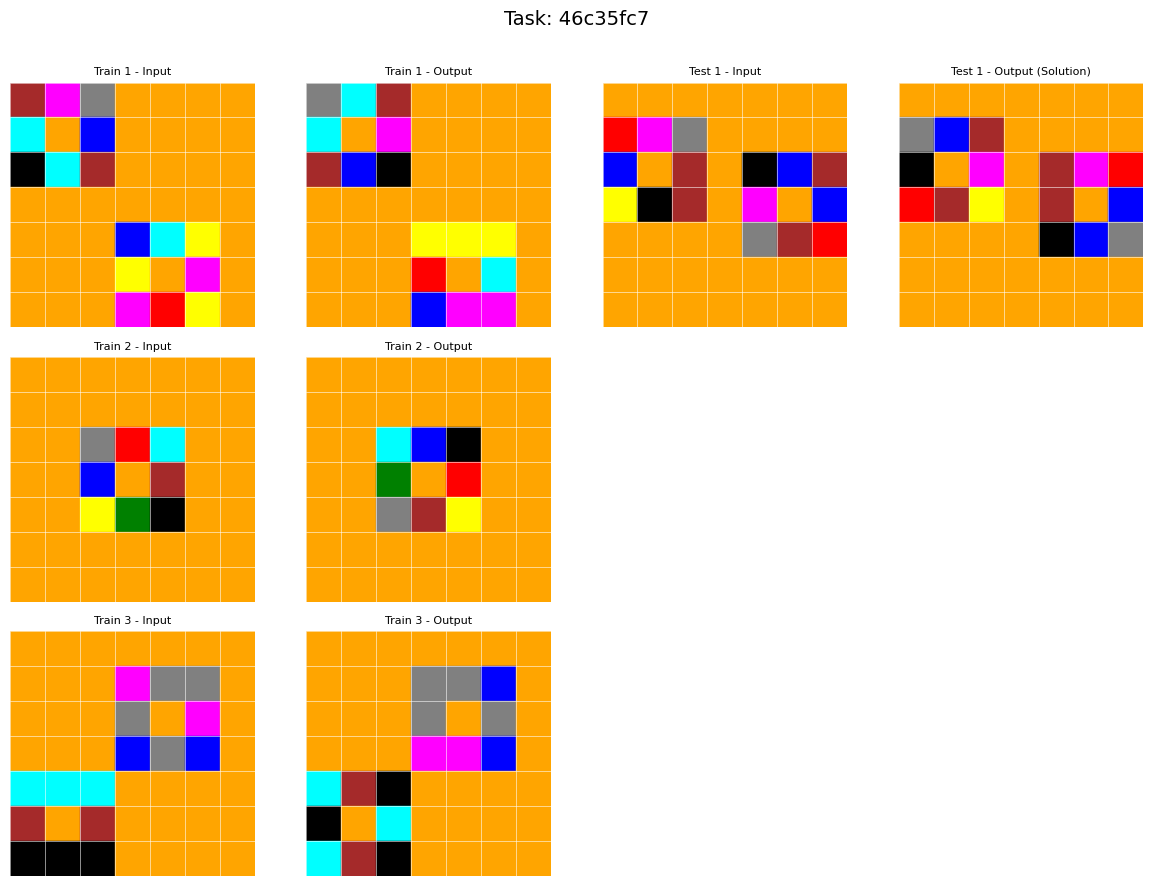

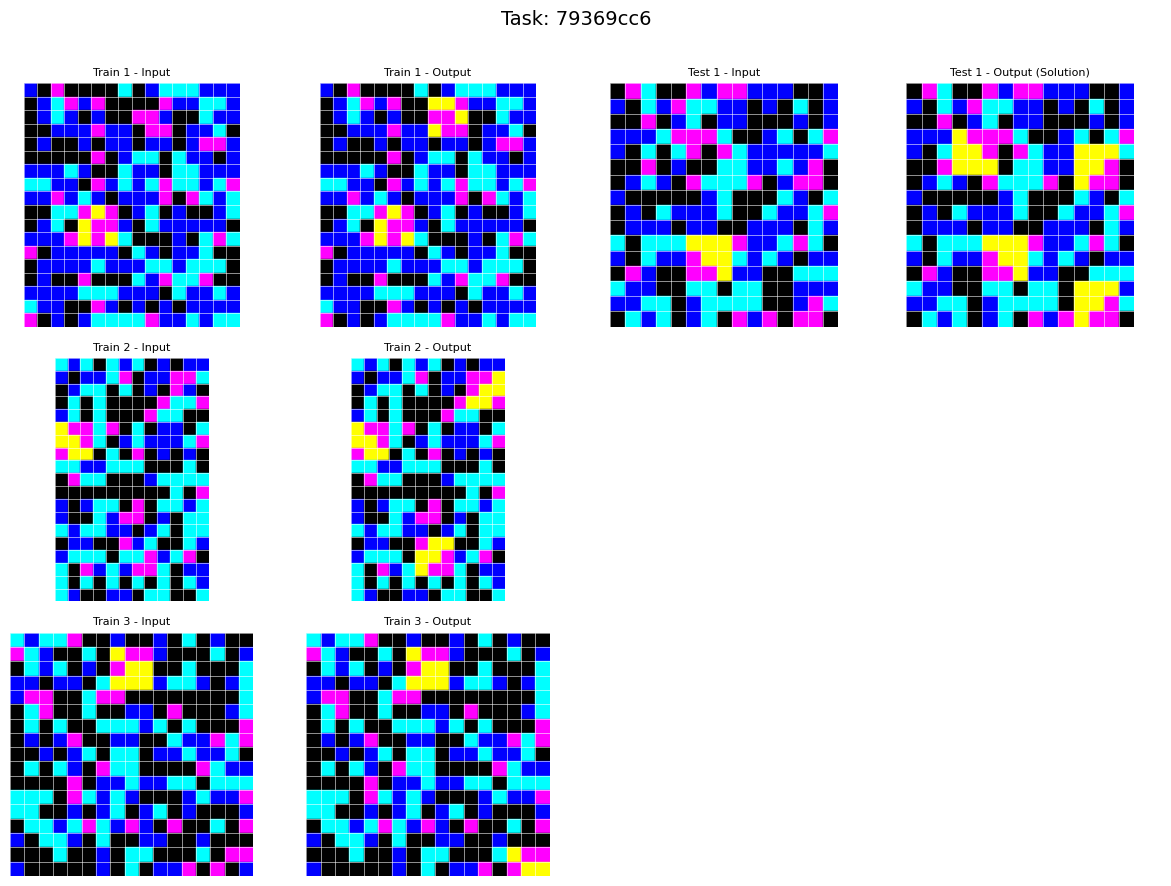

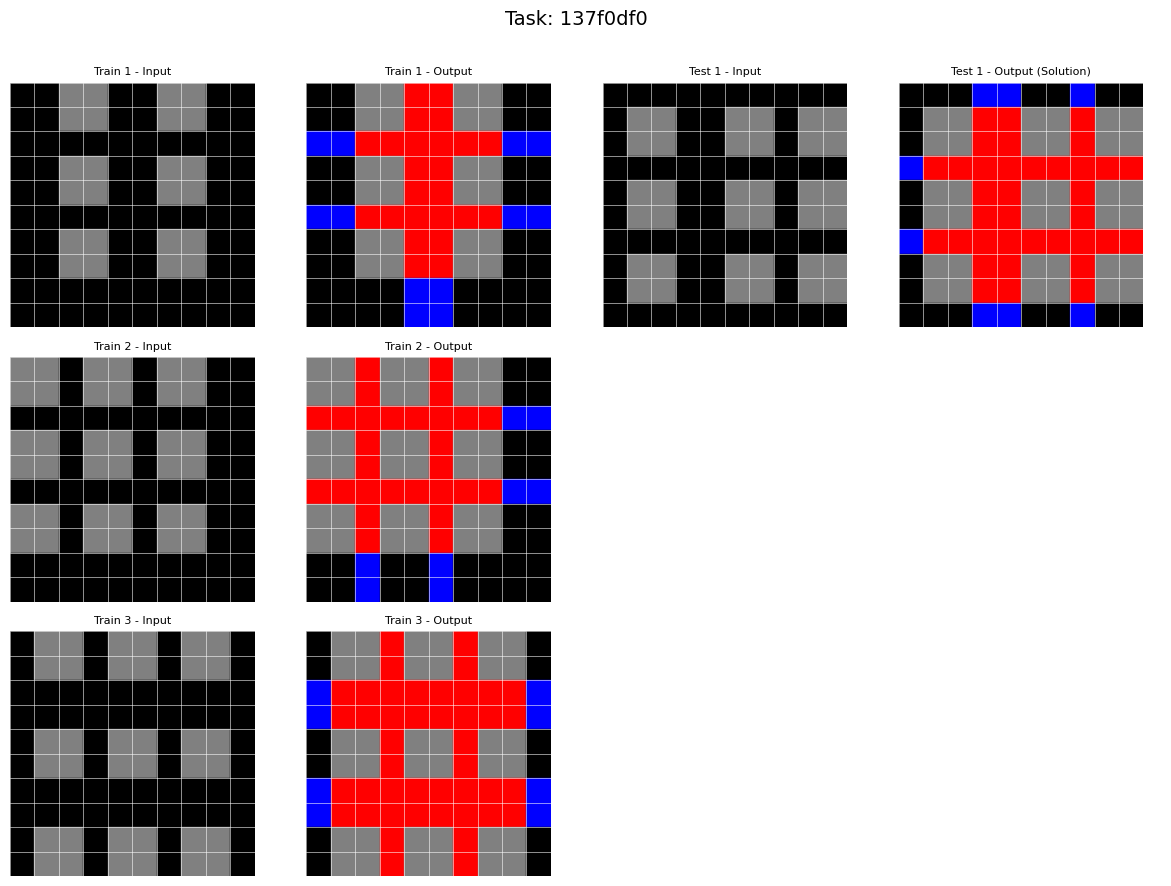

In [3]:
# Show first few tasks - training data
for _ in range(3):
    task_name = random.choice(list(train_challenges.keys()))
    task_data = train_challenges[task_name]
    task_solution = train_solutions[task_name]
    show_task(task_name, task_data, task_solution)

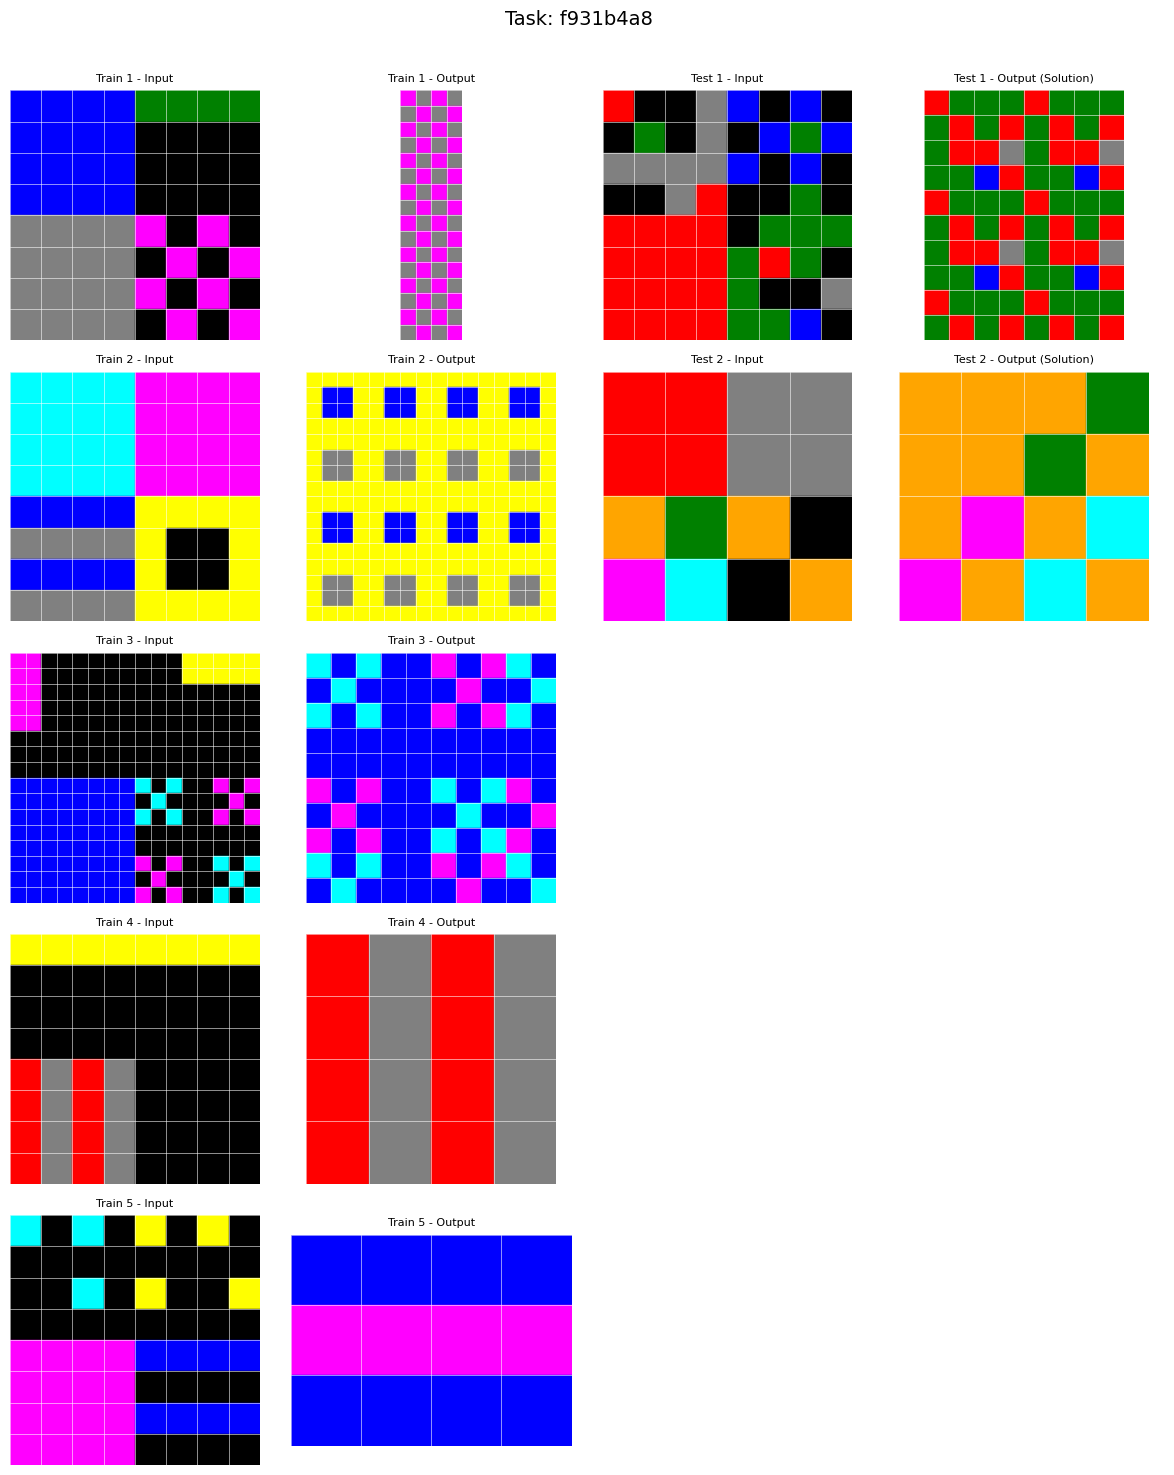

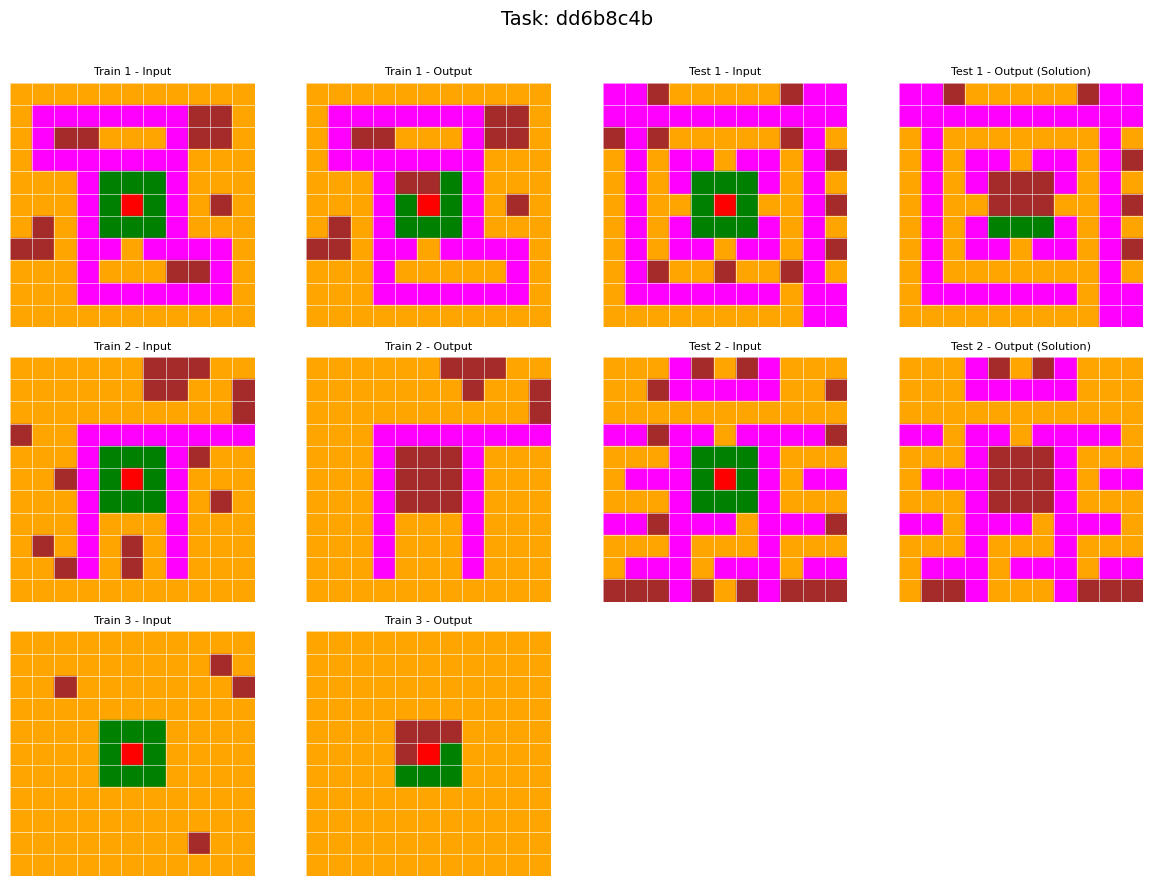

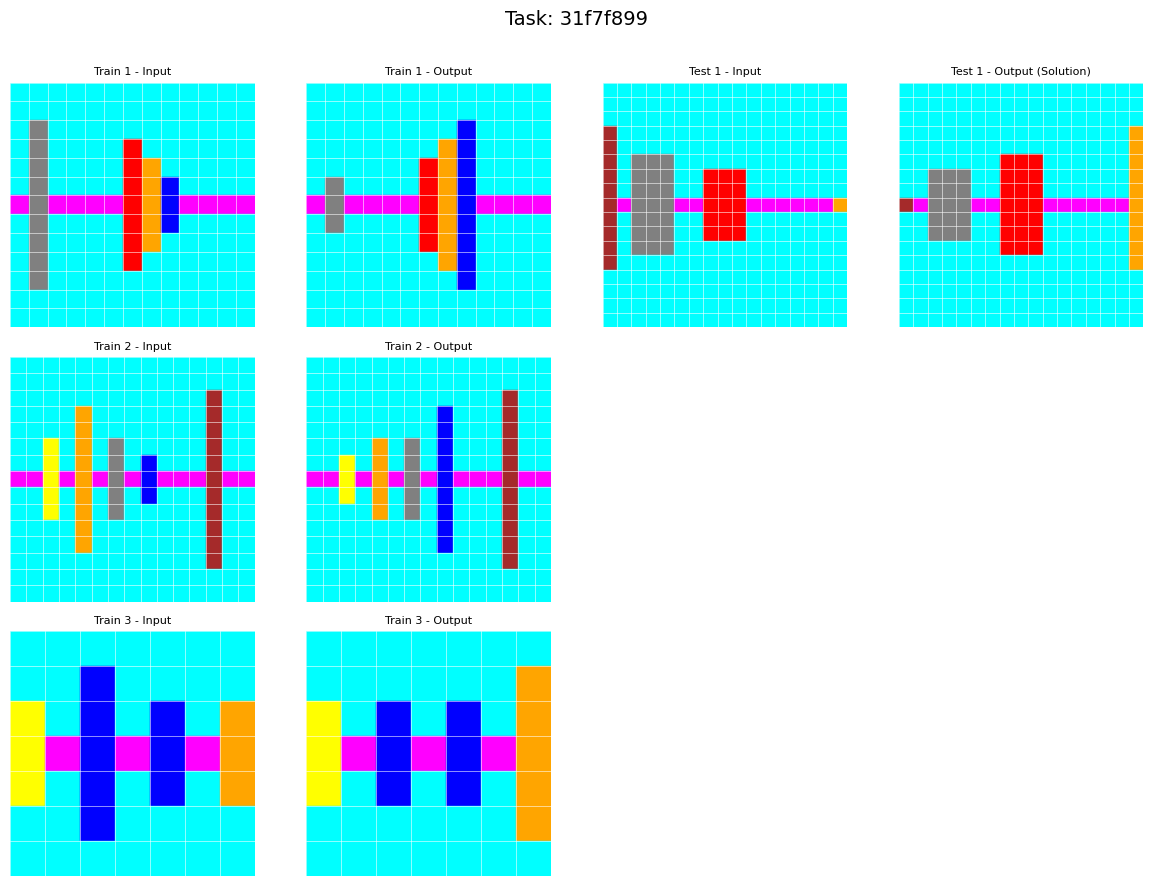

In [4]:
# Show first few tasks - evaluation data
for _ in range(3):
    task_name = random.choice(list(eval_challenges.keys()))
    task_data = eval_challenges[task_name]
    task_solution = eval_solutions[task_name]
    show_task(task_name, task_data, task_solution)

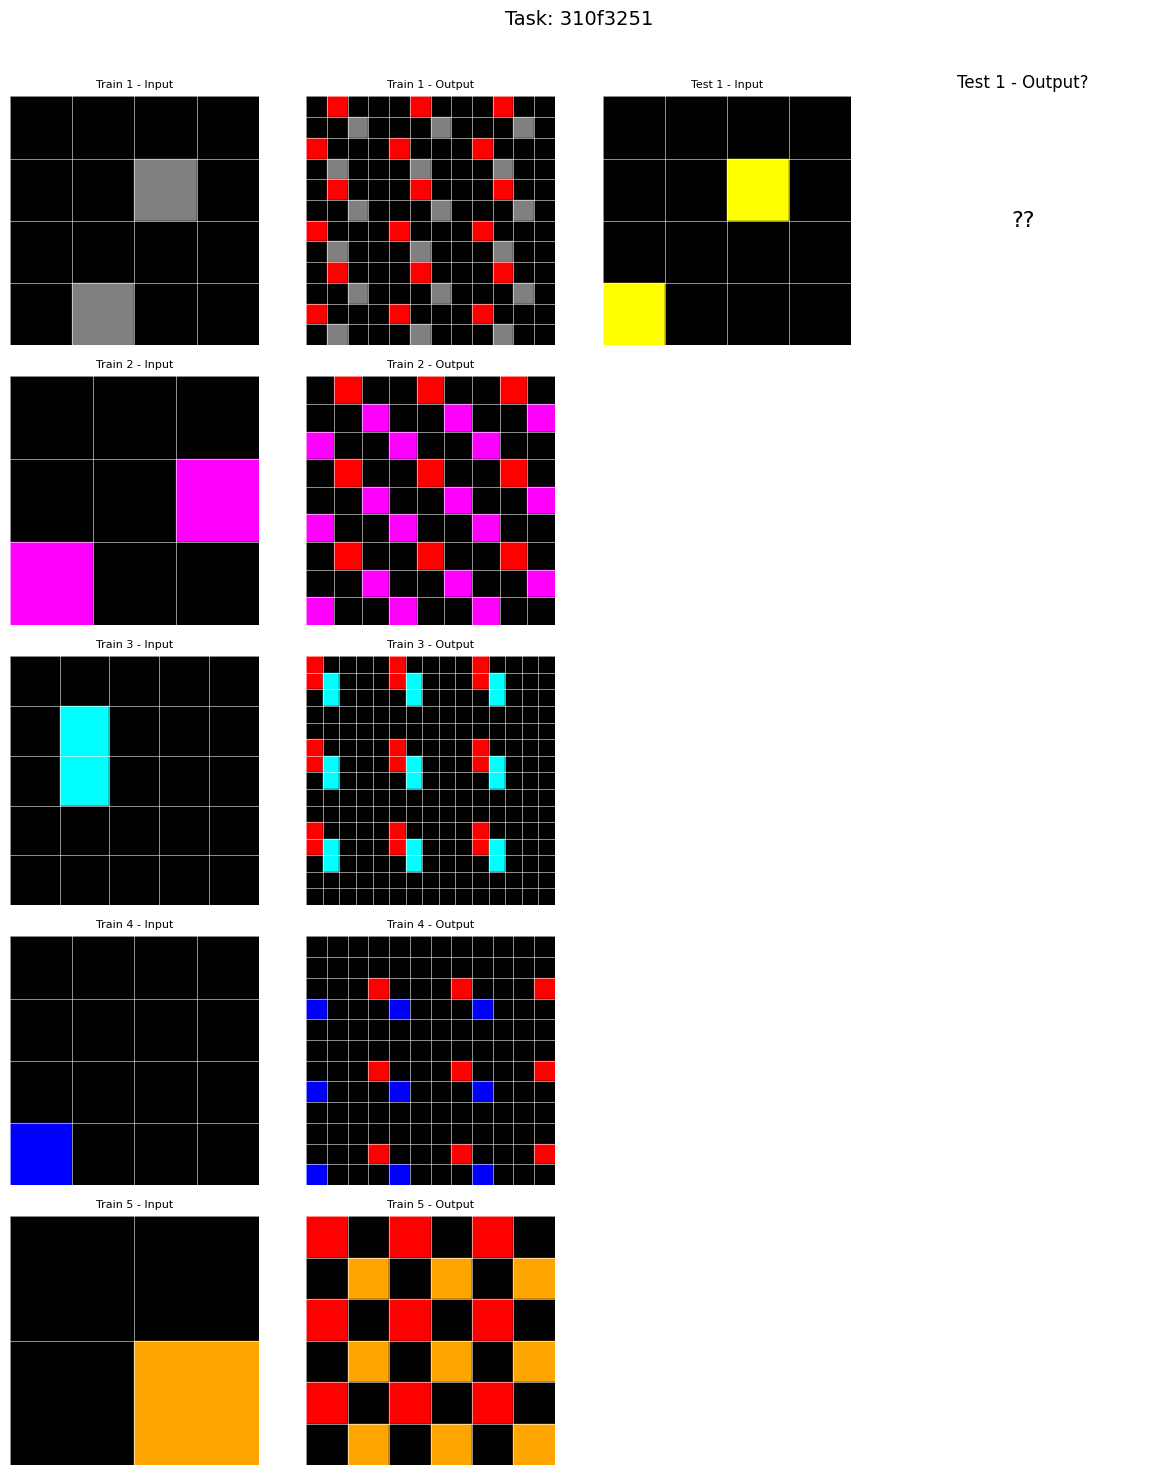

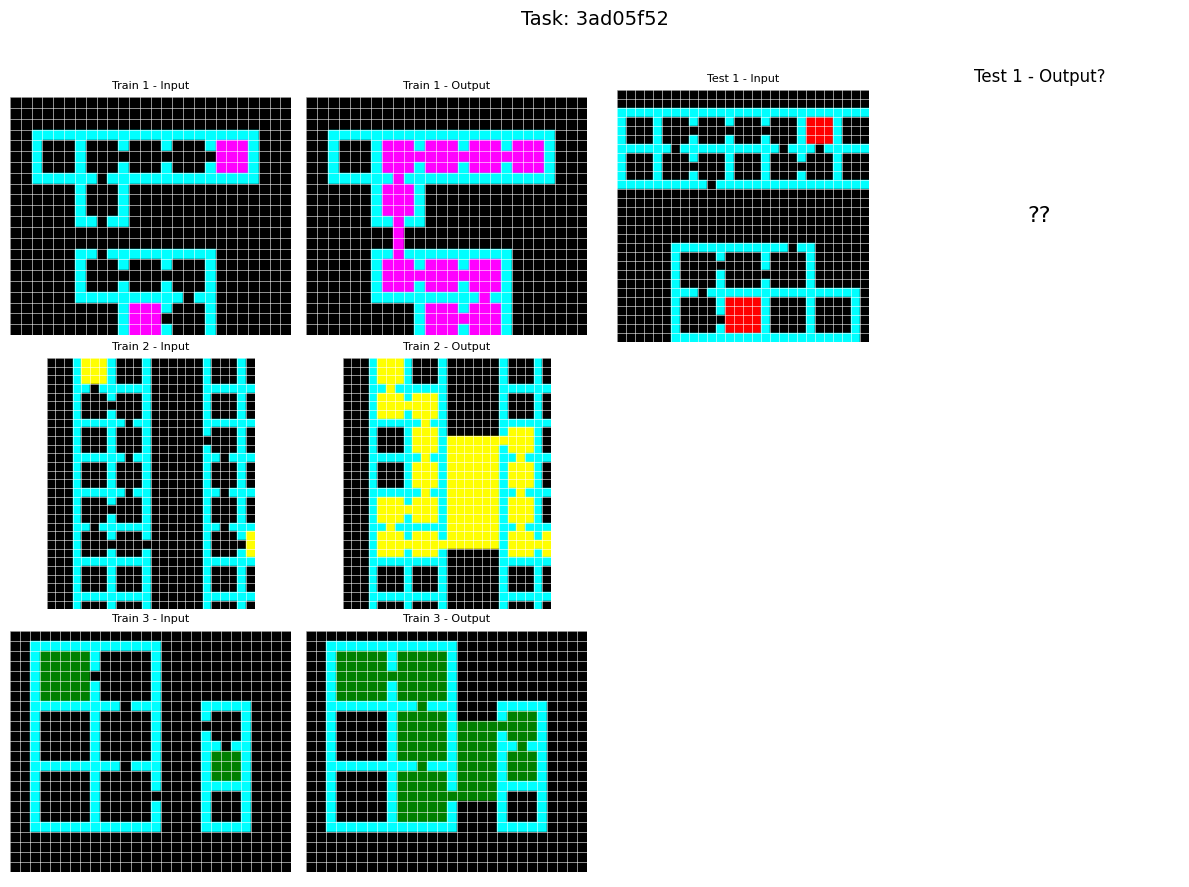

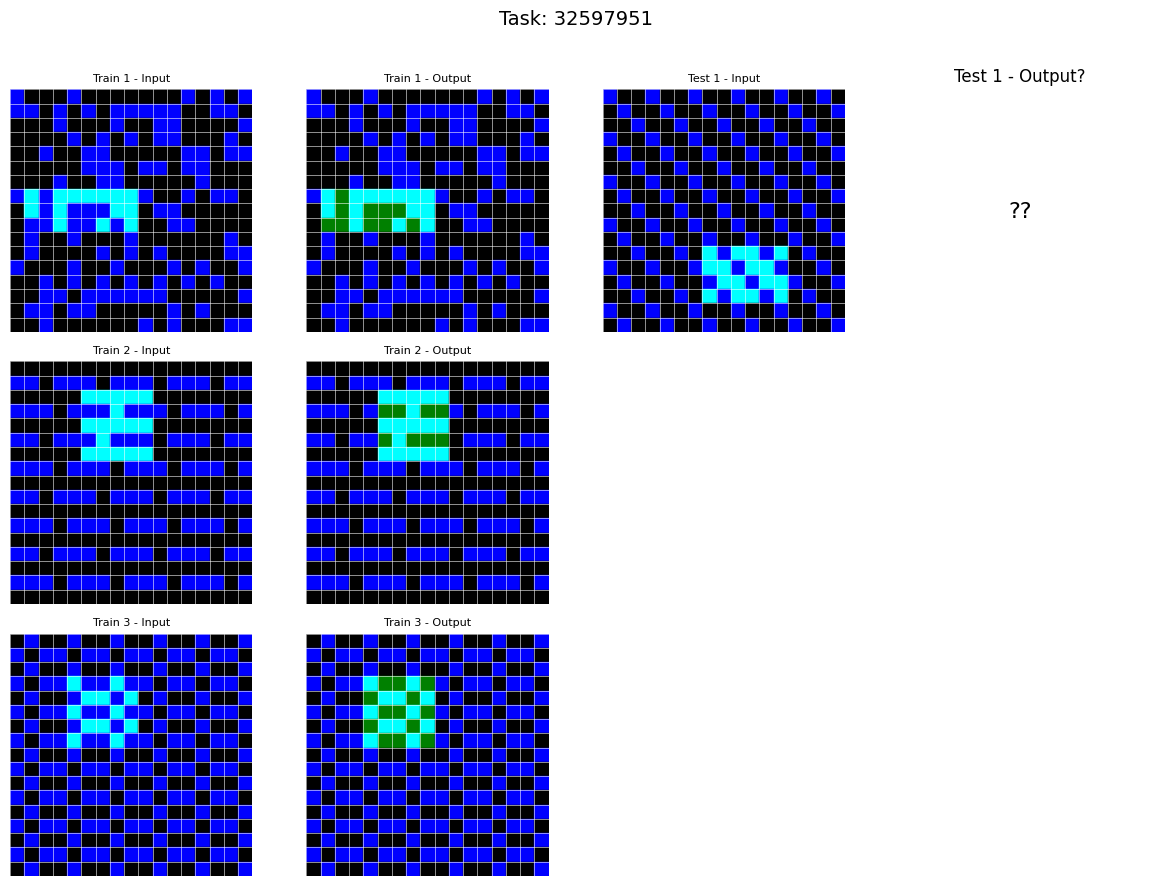

In [4]:
# Show first few tasks - test challenges
for _ in range(3):
    task_name = random.choice(list(test_challenges.keys()))
    task_data = test_challenges[task_name]
    show_task(task_name, task_data)

## Solve the Challenge

In [5]:
def solve_task(input_grid):
    # TBD - Logic goes there. Currently just returns the input.
    return input_grid

## Create Submission

In [6]:
submission = {}

for task_id, task_data in test_challenges.items():
    task_solutions = []
    for test_case in task_data['test']:
        input_grid = test_case['input']

        # predict - two attempts
        predicted_output1 = solve_task(input_grid)
        predicted_output2 = solve_task(input_grid)
        
        task_solutions.append({
            "attempt_1": {"output": predicted_output1},
            "attempt_2": {"output": predicted_output2}
        })
    
    submission[task_id] = task_solutions

print(f"{len(submission)}")
print(f"{list(submission.values())[0]}")

240
[{'attempt_1': {'output': [[3, 2], [7, 8]]}, 'attempt_2': {'output': [[3, 2], [7, 8]]}}]


### Save Into Submission File

In [7]:
with open('../output/submission.json', 'w') as f:
    json.dump(submission, f)

print(f"Submission saved as 'submission.json'")
print(f"File size: {len(json.dumps(submission))} chars")

Submission saved as 'submission.json'
File size: 393704 chars
